# 데이터 셋

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font",family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [2]:
df= pd.read_csv("C:\\Users\\user7\\Desktop\\data\\상가상권정보\\상가업소정보_201912_01.csv",sep='|')
df.shape

(573680, 39)

## 데이터 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

## 결측치 확인

In [4]:
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

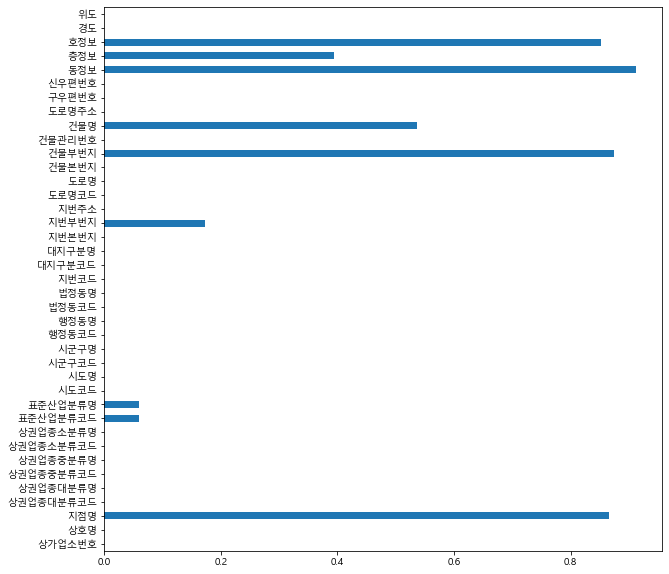

In [5]:
df.isnull().mean().plot.barh(figsize=(10,10))

## 불필요한 컬럼 제거

In [6]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
#필요한 칼럼 목록
columns=['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명','시도명','시군구명','행정동명','법정동명','도로명주소','경도','위도']

data=df[columns]
data.shape

(573680, 11)

## 서울 데이터 서브셋
* 서울만 분석할 예정이므로 서울 데이터 서브셋을 만듬
* 서브셋은 copy() 하는 것이 좋음

In [8]:
df_seoul=data[data["시도명"]=="서울특별시"].copy()
df_seoul.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675


In [9]:
df_seoul["시군구명"].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

# 데이터 전처리

* 분석목표: 베스킨라빈스와 던킨도너츠 사이의 관계

## 특정 상호만 가져오기

In [12]:
# 문자열 대문자 영어를 소문자로 바꿈
df_seoul["상호명_소문자"]=df_seoul["상호명"].str.lower()

In [22]:
df_seoul[df_seoul["상호명_소문자"].str.contains("베스킨라빈스|배스킨라빈스|baskinrobbins")]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,베스킨라빈스
11060,베스킨라빈스은행나무점,음식,패스트푸드,아이스크림판매,서울특별시,금천구,시흥5동,시흥동,서울특별시 금천구 금하로 726-1,126.910405,37.450433,베스킨라빈스은행나무점
13953,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 390,127.028565,37.497832,배스킨라빈스
14201,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,광진구,광장동,광장동,서울특별시 광진구 아차산로 494,127.096667,37.541145,베스킨라빈스
...,...,...,...,...,...,...,...,...,...,...,...,...
557464,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,은평구,진관동,진관동,서울특별시 은평구 진관2로 77,126.926589,37.634321,배스킨라빈스31
557822,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 방배로 200,126.991649,37.491305,배스킨라빈스31
558006,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,동작구,대방동,대방동,서울특별시 동작구 알마타길 6,126.924959,37.509801,배스킨라빈스31
561929,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 송파대로 111,127.124872,37.479617,배스킨라빈스31


In [21]:
df_seoul["상호명_소문자"].str.extract("(베|배)스킨라빈스|baskinrobbins")[0].value_counts()

배    347
베    117
Name: 0, dtype: int64

In [24]:
# .shape 를 통해 행,열 갯수 파악

df_seoul[df_seoul["상호명_소문자"].str.contains("베스킨라빈스|배스킨라빈스|baskinrobbins")].shape

(466, 12)

In [28]:
# 상호명_소문자 칼럼으로 배스킨라빈스 갯수 파악

df_seoul.loc[df_seoul["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"),"상호명_소문자"].shape

(466,)

In [29]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("던킨|dunkin"),"상호명_소문자"]

1167              던킨도너츠
1819        던킨도너츠테크노마트점
2305         던킨도너츠창동하나로
2342      던킨도너츠용산민자역사2호
3007              던킨도너츠
              ...      
553907            던킨도너츠
554211            던킨도너츠
558894    dunkindoonuts
560984            던킨도너츠
569825            던킨도너츠
Name: 상호명_소문자, Length: 191, dtype: object

In [35]:
# 배스킨과 던킨만 따로 저장하는 변수

df_31 = df_seoul[df_seoul["상호명_소문자"].str.contains("베스킨라빈스|배스킨라빈스|baskinrobbins|던킨|dunkin")]
df_31.shape

(657, 12)

In [37]:
df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"),"브랜드명"] = "배스킨라빈스"
df_31[["상호명","브랜드명"]]

E:\anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,상호명,브랜드명
76,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,NaN
1819,던킨도너츠테크노마트점,NaN
2164,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,NaN
...,...,...
558894,DUNKINDOONUTS,NaN
560984,던킨도너츠,NaN
561929,배스킨라빈스31,배스킨라빈스
561930,배스킨라빈스31,배스킨라빈스


In [38]:
df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")
df_31["브랜드명"]

<ipython-input-38-c0c568cff786>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")


76        배스킨라빈스
1167       던킨도너츠
1819       던킨도너츠
2164      배스킨라빈스
2305       던킨도너츠
           ...  
558894     던킨도너츠
560984     던킨도너츠
561929    배스킨라빈스
561930    배스킨라빈스
569825     던킨도너츠
Name: 브랜드명, Length: 657, dtype: object

In [39]:
df_31["상권업종대분류명"].value_counts()

음식       655
소매         1
생활서비스      1
Name: 상권업종대분류명, dtype: int64

In [40]:
df_31[df_31["상권업종대분류명"].isin(["소매","생활서비스"])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,배스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,배스킨라빈스


In [42]:
# 상권업종대분류명에서 "소매","생활서비스"는 제거

df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매","생활서비스"])].copy()
df_31.shape

(655, 13)

## 범주형 값으로 countplot 그리기

In [43]:
# value_count 로 "브랜드명" 빈도수 확인

df_31["브랜드명"].value_counts()

배스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

In [44]:
# normalize=True 로 빈도수 비율

df_31["브랜드명"].value_counts(normalize=True)

배스킨라빈스    0.708397
던킨도너츠     0.291603
Name: 브랜드명, dtype: float64

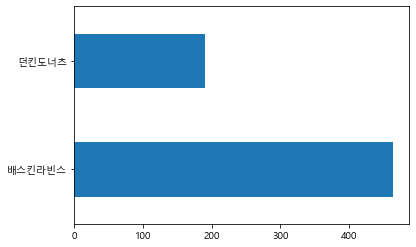

In [45]:
df_31["브랜드명"].value_counts().plot.barh()

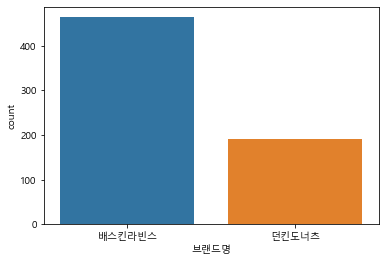

In [46]:
sns.countplot(data=df_31,x="브랜드명")

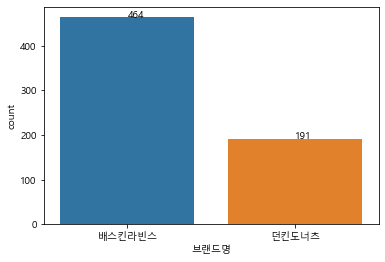

In [52]:
brand_count = df_31["브랜드명"].value_counts()

g = sns.countplot(data=df_31,x="브랜드명")

for i , val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])

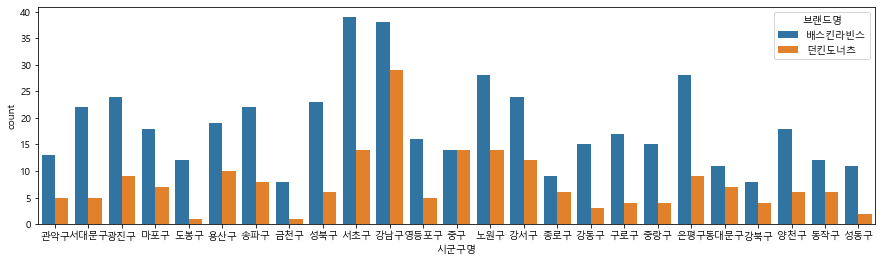

In [56]:
plt.figure(figsize=(15,4))
g = sns.countplot(data=df_31, x="시군구명",hue="브랜드명")

## scatterplot

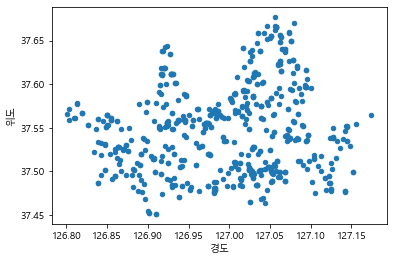

In [57]:
df_31[["위도","경도"]].plot.scatter(x="경도",y="위도")

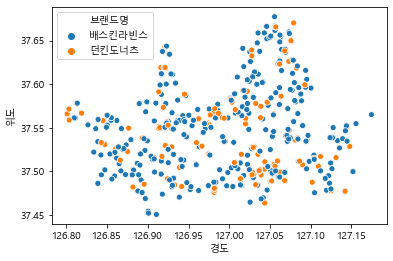

In [58]:
sns.scatterplot(data=df_31,x="경도",y="위도",hue="브랜드명")

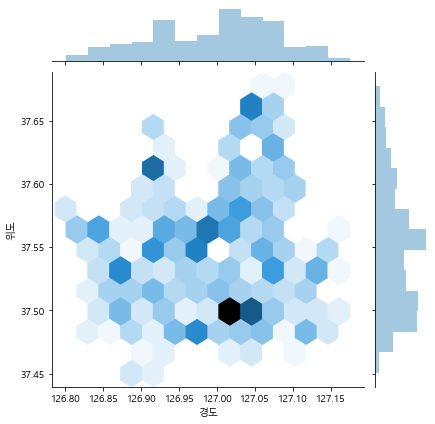

In [61]:
sns.jointplot(data=df_31,x="경도",y="위도",kind="hex")

# Folium 으로 지도 활용

In [62]:
import folium

In [64]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구함
lat=df_31["위도"].mean()
long=df_31["경도"].mean()

In [68]:
m=folium.Map([lat,long])
m

In [69]:
# 샘플 하나 추출
df_31.sample(random_state=31)

#127.039032 ,37.495593  경도, 위도 순으로 표시됨

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
276889,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 논현로 341,127.039032,37.495593,던킨도너츠,던킨도너츠


In [72]:
folium.Marker([37.495593,127.039032],popup='<i>던킨도너츠</i>',tooltip="던킨도너츠").add_to(m)
m.save("index.html")

## 기본 마커로 표현

In [73]:
df_31.index

Int64Index([    76,   1167,   1819,   2164,   2305,   2342,   3007,  11060,
             13042,  13925,
            ...
            554896, 555145, 557464, 557822, 558006, 558894, 560984, 561929,
            561930, 569825],
           dtype='int64', length=655)

In [80]:
m=folium.Map([lat,long])

for i in df_31.index[:]:
    
    sub_lat = df_31.loc[i,"위도"]
    sub_long = df_31.loc[i,"경도"]
    title = df_31.loc[i,"상호명"] +"-"+ df_31.loc[i,"도로명주소"]
    
    icon_color="blue"
    if df_31.loc[i,"브랜드명"]=="던킨도너츠":
        icon_color="pink"
    
    folium.Marker(
        [sub_lat,sub_long],
        icon=folium.Icon(color=icon_color),
        popup='<i>(title)</i>',
        tooltip=title).add_to(m)
    
m.save("index.html")
m

## MarkerCluster

In [81]:
from folium.plugins import MarkerCluster

m=folium.Map([lat,long])
marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index[:]:
    
    sub_lat = df_31.loc[i,"위도"]
    sub_long = df_31.loc[i,"경도"]
    title = df_31.loc[i,"상호명"] +"-"+ df_31.loc[i,"도로명주소"]
    
    icon_color="blue"
    if df_31.loc[i,"브랜드명"]=="던킨도너츠":
        icon_color="pink"
    
    folium.Marker(
        [sub_lat,sub_long],
        icon=folium.Icon(color=icon_color),
        popup='<i>(title)</i>',
        tooltip=title).add_to(marker_cluster)
    
m.save("index.html")
m